In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family = 'Malgun Gothic')

apart = pd.read_csv('apart.csv')

In [2]:
apart = apart.query('계약년도 > 2009')

In [3]:
# 거래금액 ,지우고 int로 바꾸기
apart['거래금액'] = apart['거래금액'].apply(lambda x : int(x.replace(',','')))

In [4]:
# 단지열 이름 바꾸기
apart.rename(columns = {apart.columns[1]:'단지'}, inplace = True)

In [5]:
# 계약년도 문자열로 바꾸기
apart['계약년도'] = apart['계약년도'].apply(lambda x : str(int(x)))

In [6]:
# 계약일에서 월 추출 + 2자리로 맞추기
apart['계약일'] = apart['계약일'].apply(lambda x : '{0:02d}'.format(int(str(x).split('.')[0])))

In [7]:
# 계약시기 만들기
apart['계약시기'] = apart['계약년도'] + '.' +apart['계약일']

In [8]:
apart

,구,단지,준공년도,계약년도,계약일,건물전용면적(㎡),층,거래금액,계약시기
10272,성북,경남,[1999],2010,01,59.59,21,24400,2010.01
13116,성북,경남,[1999],2010,11,45.77,17,19450,2010.11
13117,성북,경남,[1999],2010,12,50.45,6,16000,2010.12
13118,성북,경남,[1999],2010,01,59.59,21,24400,2010.01
13119,성북,경남,[1999],2010,03,59.59,16,25200,2010.03
...,...,...,...,...,...,...,...,...,...
1134596,은평,힐스테이트녹번,[2019],2020,06,59.94,9,92500,2020.06
1134597,은평,힐스테이트녹번,[2019],2020,06,59.94,7,89900,2020.06
1134598,은평,힐스테이트녹번,[2019],2020,03,84.90,6,115000,2020.03
1134599,은평,힐스테이트녹번,[2019],2020,05,84.90,11,112500,2020.05


In [9]:
apart_time = apart.query('단지 == "월곡두산위브"')[['계약시기','거래금액']]
apart_time = apart_time.drop_duplicates(['계약시기','거래금액'], keep="first")

In [10]:
apart_time

,계약시기,거래금액
14314,2010.01,32900
14315,2010.01,33000
14316,2010.01,30000
14317,2010.01,31450
14318,2010.02,32300
...,...,...
55402,2020.06,75000
55404,2020.06,76000
55406,2020.06,79400
55407,2020.06,79500


In [11]:
apart_time = apart_time.groupby('계약시기')['거래금액'].agg(lambda x : round(x.mean(),0)).reset_index().sort_values(by = '계약시기')

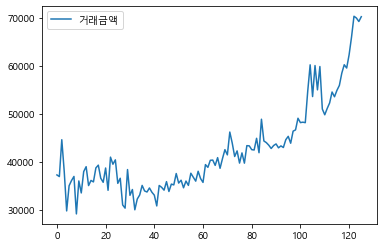

In [12]:
apart_time.plot()

In [14]:
apart_time

,계약시기,거래금액
0,2010-01-01,37257
1,2010-02-01,36912
2,2010-03-01,44600
3,2010-04-01,38000
4,2010-05-01,29750
...,...,...
121,2020-02-01,66025
122,2020-03-01,70350
123,2020-04-01,69978
124,2020-05-01,69250


In [40]:
apart_time.to_csv('apart_time_month.csv',index = False)

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


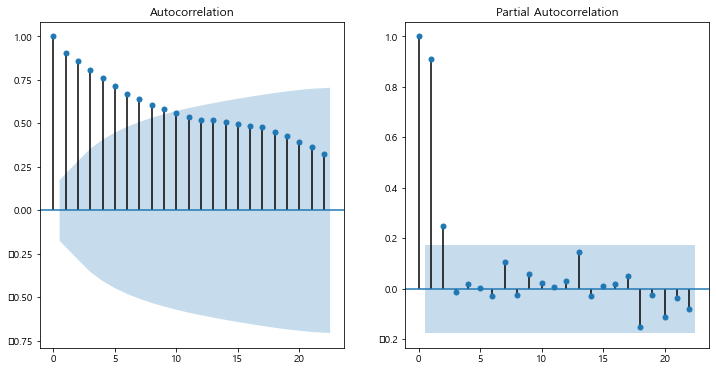

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
plot_acf(apart_time['거래금액'],ax = ax1)

ax2 = plt.subplot(1,2,2)
plot_pacf(apart_time['거래금액'],ax = ax2)

plt.show()

C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lee_HyeonJun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


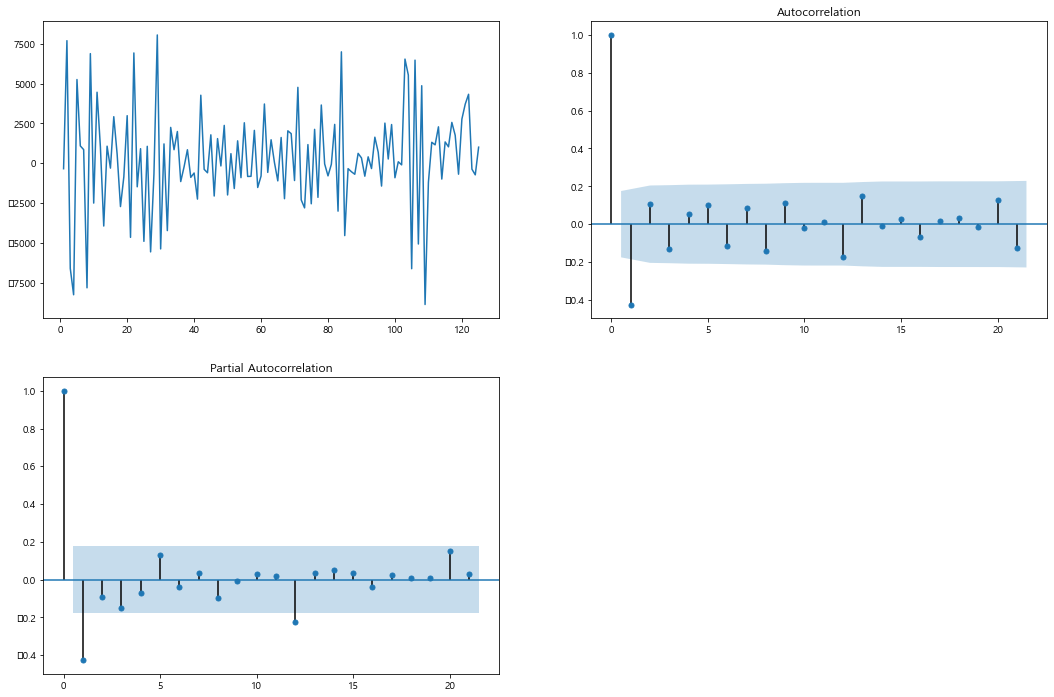

In [14]:
diff_1 = apart_time['거래금액'].diff(periods=1).iloc[1:]

plt.figure(figsize=(18,12))
ax1 = plt.subplot(2,2,1)
diff_1.plot(ax = ax1)

ax2 = plt.subplot(2,2,2)
plot_acf(diff_1, ax = ax2)

ax3 = plt.subplot(2,2,3)
plot_pacf(diff_1, ax = ax3)


plt.show()

In [18]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(apart_time['거래금액'], order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.거래금액   No. Observations:                  125
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1171.262
Method:                       css-mle   S.D. of innovations           2836.098
Date:                Wed, 22 Jul 2020   AIC                           2348.524
Time:                        05:16:14   BIC                           2357.009
Sample:                             1   HQIC                          2351.971
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          258.3968    136.693      1.890      0.059      -9.516     526.309
ma.L1.D.거래금액    -0.4649      0.077     -6.064      0.000      -0.615      -0.315
                                    Roots   

In [19]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(apart_time['거래금액'], order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.거래금액   No. Observations:                  125
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1172.922
Method:                       css-mle   S.D. of innovations           2874.434
Date:                Wed, 22 Jul 2020   AIC                           2349.844
Time:                        05:16:20   BIC                           2355.500
Sample:                             1   HQIC                          2352.142
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ma.L1.D.거래금액    -0.4317      0.075     -5.734      0.000      -0.579      -0.284
                                    Roots                                    
                  Real          Imaginary      

In [2]:
model_fit.plot_predict()

NameError: name 'model_fit' is not defined

In [21]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([69762.18008087]), array([2874.43398136]), array([[64128.39300146, 75395.96716029]]))


In [22]:
from pmdarima.arima import auto_arima

In [28]:
apart_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   계약시기    126 non-null    datetime64[ns]
 1   거래금액    126 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [29]:
apart_time.head()

,계약시기,거래금액
0,2010-01-01,37257
1,2010-02-01,36912
2,2010-03-01,44600
3,2010-04-01,38000
4,2010-05-01,29750


In [23]:
apart_time.set_index('계약시기',inplace = True)

In [24]:
apart_time

,거래금액
계약시기,
2010.01,37257
2010.02,36912
2010.03,44600
2010.04,38000
2010.05,29750
...,...
2020.02,66025
2020.03,70350
2020.04,69978


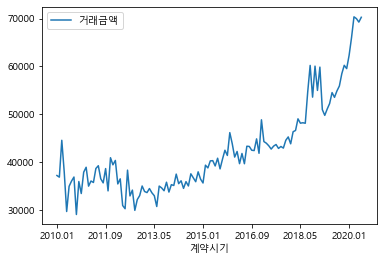

In [25]:
apart_time.plot()

In [26]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(apart_time)

(0.9838733228420806, True)

In [38]:
apart_time.index.nunique()

126

In [27]:
train = apart_time[:-18]
test = apart_time[-18:]

In [3]:
import pandas as pd 
apart_time =pd.read_csv('apart_time_month.csv')
apart_time

,계약시기,거래금액
0,2006-01-01,31260
1,2006-02-01,31959
2,2006-03-01,32436
3,2006-04-01,29891
4,2006-05-01,29688
...,...,...
167,2020-02-01,66025
168,2020-03-01,70350
169,2020-04-01,69978
170,2020-05-01,69250


## Keras

In [32]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

apart_time =pd.read_csv('apart_time_month.csv')
apart_time.head()

,date,price
0,2006-01-01,31260
1,2006-02-01,31959
2,2006-03-01,32436
3,2006-04-01,29891
4,2006-05-01,29688


            price
date             
2006-01-31  31260
2006-02-28  31959
2006-03-31  32436
2006-04-30  29891
2006-05-31  29688


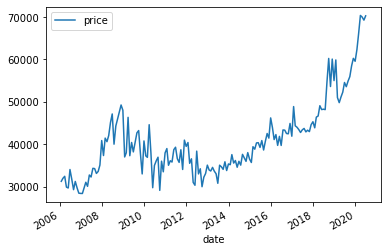

In [33]:
from pandas.tseries.offsets import MonthEnd

apart_time['date'] = pd.to_datetime(apart_time['date']) + MonthEnd(1)
apart_time = apart_time.set_index('date')
print(apart_time.head())
apart_time.plot()

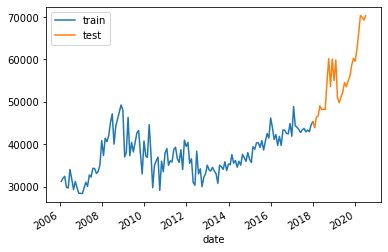

In [34]:
split_date = pd.Timestamp('12-31-2017')

train = apart_time.loc[:split_date, ['price']]
test = apart_time.loc[split_date:, ['price']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])